In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp
%matplotlib inline

### Question 1: Constitutive gene expression system

Let us model the expression of a putative mRNA and protein:  
$$
\frac{dm(t)}{dt} = k_{1} - d_{1} m
$$
$$
\frac{dp(t)}{dt} = k_{2} m - d_{2} p
$$
where $m$ is an mRNA amount and $p$ is a protein amount.

The parameters can be interpreted as:  
$k_{1}$ is the mRNA production rate  
$k_{2}$ is the protein production rate  
$d_{1}$ is the mRNA degradation rate  
$d_{2}$ is the protein degradation rate

* Write code to implement this model using the following parameter values:  
$k_{1} = 3$  
$k_{2} = 0.5$  
$d_{1} = 0.01$  
$d_{2} = 0.05$  

* Run the model for different initial amounts of mRNA and protein.
* What are the amounts of mRNA and protein at steady state for this model?

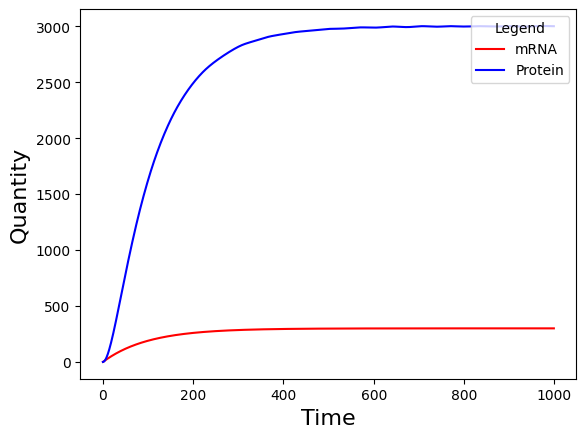

In [3]:
def gene_expr(t, x, k1, k2, d1, d2):
    m = x[0]
    p = x[1]
    dmdt = k1 - d1 * m
    dpdt = k2 * m - d2 * p
    return [dmdt, dpdt]

Tmax = 1000                 # Maximum time
t_span = (0, Tmax)          # Time span of the simulation
t = np.arange(0, Tmax, 1)   # Times at which to store the solution
k1 = 3                      # mRNA production rate
k2 = 0.5                    # Protein production rate
d1 = 0.01                   # mRNA degradation rate
d2 = 0.05                   # Protein degradation rate

x0 = [0, 0]                 # Initial amounts of mRNA and protein
pop1 = solve_ivp(gene_expr, t_span, x0, args=[k1, k2, d1, d2], t_eval=t)

plt.plot(pop1.t, pop1.y[0], 'r', label="mRNA")
plt.plot(pop1.t, pop1.y[1], 'b', label="Protein")

plt.xlabel("Time", fontsize=16)
plt.ylabel("Quantity", fontsize=16)
plt.legend(loc='upper right', title="Legend")

In [4]:
mRNA_steady_state = k1/d1
protein_steady_state = (k2 *mRNA_steady_state)/d2

print("Steady state of mRNA",mRNA_steady_state)
print("Steady state of protein",protein_steady_state)

Steady state of mRNA 300.0
Steady state of protein 3000.0


### Question 2. Gene regulation

Consider a system where the transcription of a gene is activated by its protein level. This is called a positive feedback loop:

$$
\frac{dm(t)}{dt} = k_{1} \frac{p^{n}}{p^{n}+K^{n}} - d_{1} m
$$

$$
\frac{dp(t)}{dt}=k_{2}m-d_{2}p
$$

In the equation above, the transcription rate depends on the value of $p$. More precisely, transcription depends on the amount of $p^{n}$, and it is also saturated: that is for large $p$ the ratio $\frac{p^{n}}{p^{n}+K^{n}}$ is going to approach 1.

$n$ is called a cooperativity coefficient. $n=2$ can be interpreted as two proteins having to cooperatively bind to DNA to start transcription. This might correspond to the number of binding sites in the promoter.

* Plot the ratio $\frac{p^{n}}{p^{n}+K^{n}}$ as a function of $p$ for different values of $n$. Use $K = 50000$ and $p$ ranging from 0 to 100000. What happens when $n$ increases, and how could we approximate the shape for high values of $n$?

In [5]:
k = 50000
n = 2

for p in range(0,100001,20000):
    ratio = p**n / (p**n + k**n)  
    print(f"When P = {p}, the ratio = {ratio}")
    
#When n increases so does the ratio. This means when cooperativity increases so does the amount of mRNA

When P = 0, the ratio = 0.0
When P = 20000, the ratio = 0.13793103448275862
When P = 40000, the ratio = 0.3902439024390244
When P = 60000, the ratio = 0.5901639344262295
When P = 80000, the ratio = 0.7191011235955056
When P = 100000, the ratio = 0.8


* In the equation above $K$ can be interpreted as a saturation constant. What happens when you change $K$? What is the difference between low and high $K$?



In [6]:
k = 60000
n = 2

for p in range(0,100001,20000):
    ratio = p**n / (p**n + k**n)  
    print(f"When P = {p}, the ratio = {ratio}")
    
#Increasing K decreases the ratio and decreasing K increases the ratio. This means when saturation of protein increases do does mRNA

When P = 0, the ratio = 0.0
When P = 20000, the ratio = 0.1
When P = 40000, the ratio = 0.3076923076923077
When P = 60000, the ratio = 0.5
When P = 80000, the ratio = 0.64
When P = 100000, the ratio = 0.7352941176470589


* Use the previous regulatory function to simulate the amount of mRNA and protein over time with $n=2$, $K=50000$, $k_{1} = 3$, $k_{2} = 10$, $d_{1} = 0.02$, $d_{2} = 0.006$, using the following initial conditions:

(i) x0=[100,0]

(ii) x0=[0,0]

(iii) x0=[0,10]

(iv) x0=[2,10000]

Plot all initial conditions on the same graph, but use different graphs for the mRNA and protein levels. How many steady states can you see?

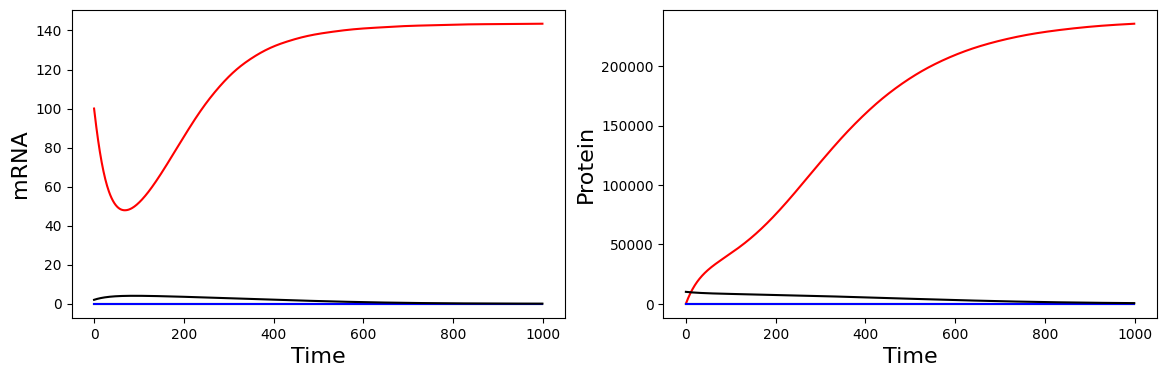

In [8]:
def gene_expr(t, x, k1, k2, d1, d2, K, n):
    m = x[0]
    p = x[1]
    dmdt = k1 * p**n / (p**n+K**n) - d1 * m
    dpdt = k2 * m - d2 * p
    return [dmdt, dpdt]

Tmax = 1000                 # Maximum time
t_span = (0, Tmax)          # Time span of the simulation
t = np.arange(0, Tmax, 1)   # Times at which to store the solution
k1 = 3                      # mRNA production rate
k2 = 10                     # Protein production rate
d1 = 0.02                   # mRNA degradation rate
d2 = 0.006                  # Protein degradation rate
K = 50000                   # Saturation constant
n = 2                       # Cooperativity coefficient

x01 = [100, 0]              # Initial amounts of mRNA and protein
x02 = [0, 0]
x03 = [0, 10]
x04 = [2, 10000]
pop1 = solve_ivp(gene_expr, t_span, x01, args=[k1, k2, d1, d2, K, n], t_eval=t)
pop2 = solve_ivp(gene_expr, t_span, x02, args=[k1, k2, d1, d2, K, n], t_eval=t)
pop3 = solve_ivp(gene_expr, t_span, x03, args=[k1, k2, d1, d2, K, n], t_eval=t)
pop4 = solve_ivp(gene_expr, t_span, x04, args=[k1, k2, d1, d2, K, n], t_eval=t)

plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(pop1.t, pop1.y[0], 'r-')
plt.plot(pop2.t, pop2.y[0], 'g-')
plt.plot(pop3.t, pop3.y[0], 'b-')
plt.plot(pop4.t, pop4.y[0], 'k-')
plt.xlabel("Time", fontsize=16)
plt.ylabel("mRNA", fontsize=16)

plt.subplot(122)
plt.plot(pop1.t, pop1.y[1], 'r-')
plt.plot(pop2.t, pop2.y[1], 'g-')
plt.plot(pop3.t, pop3.y[1], 'b-')
plt.plot(pop4.t, pop4.y[1], 'k-')
plt.xlabel("Time", fontsize=16)
plt.ylabel("Protein", fontsize=16)

plt.show()